<a href="https://colab.research.google.com/github/b4lbs/alura_ML_classificacao_sklearn/blob/main/Introdu%C3%A7%C3%A3o_a_Machine_Learning_e_Classifica%C3%A7%C3%A3o_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = {
    "mileage_per_year" : "milhas_por_ano",
    "model_year" : "ano_do_modelo",
    "price" : "preco",
    "sold" : "vendido"
}
dados = dados.rename(columns = a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [ ]:
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'])
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']


SEED = 42
np.random.seed(SEED)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25,
                                                         stratify = y)
print(f'Treinaremos com {len(train_X)} elementos e testaremos com {len(test_X)} elementos.')

model = LinearSVC()
model.fit(train_X, train_y)
previsoes = model.predict(test_X)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi 52.60%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(train_X, train_y)
acuracia = dummy_stratified.score(test_X, test_y) * 100

print(f"A acurácia do dummy stratified foi {acuracia:.2f}%")

A acurácia do dummy stratified foi 52.64%


In [ ]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(train_X, train_y)
acuracia = dummy_mostfrequent.score(test_X, test_y) * 100

print(f"A acurácia do dummy most frequent foi {acuracia:.2f}%")

A acurácia do dummy most frequent foi 58.00%


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 42
np.random.seed(SEED)
raw_train_X, raw_test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25,
                                                         stratify = y)
print(f'Treinaremos com {len(train_X)} elementos e testaremos com {len(test_X)} elementos.')

scaler = StandardScaler()
scaler.fit(raw_train_X)
train_X = scaler.transform(raw_train_X)
test_X = scaler.transform(raw_test_X)

model = SVC()
model.fit(train_X, train_y)
previsoes = model.predict(test_X)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi 76.04%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 42
np.random.seed(SEED)
raw_train_X, raw_test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25,
                                                         stratify = y)
print(f'Treinaremos com {len(train_X)} elementos e testaremos com {len(test_X)} elementos.')


model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_train_X, train_y)
previsoes = model.predict(raw_test_X)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi 78.04%


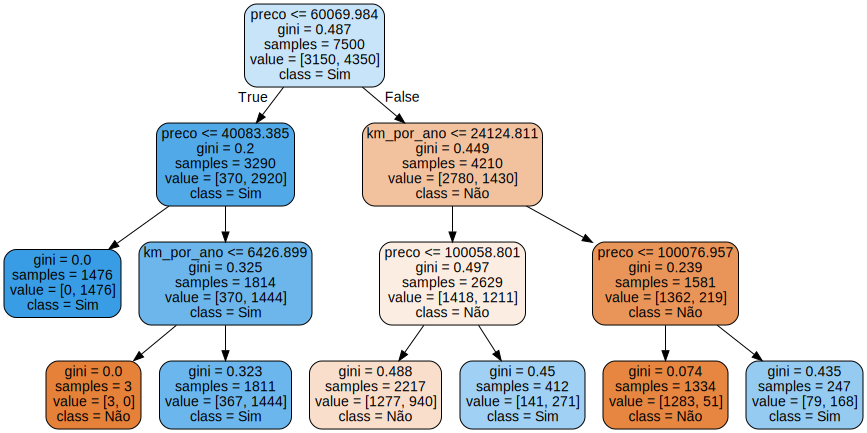

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(model, feature_names= features,
                           filled = True, rounded = True,
                           class_names = ["Não", "Sim"])
grafico = graphviz.Source(dot_data)
grafico